In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('../data/merged_APPA_data.csv', encoding='windows-1252')

<AxesSubplot:xlabel='WeekDay', ylabel='Valore'>

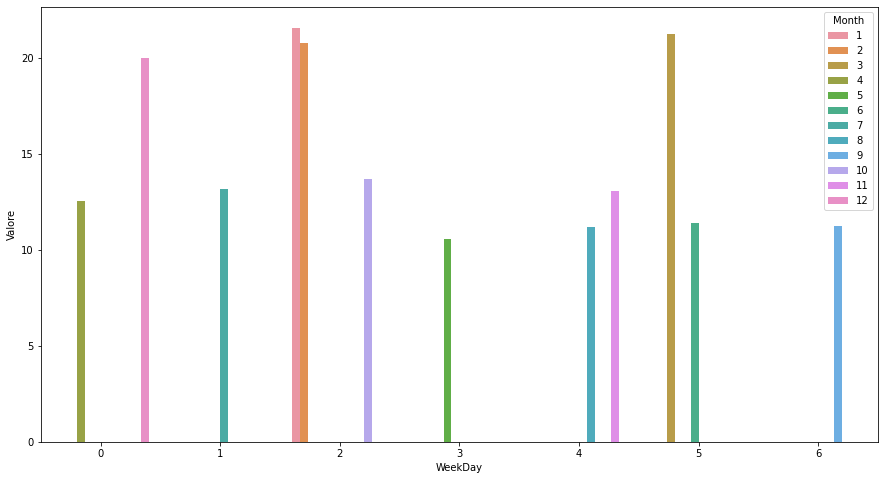

In [10]:
#Plot Weekly  3rd Section
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df["Valore"] = pd.to_numeric(df.Valore)
df["Data"] = pd.to_datetime(df.Data)
df_week_avg = df[(df.Stazione == "Rovereto") & (df.Inquinante == "PM2.5") & (df.Data.dt.year == 2018)]
#print(df_week_avg)

df_week_avg = df_week_avg.groupby(pd.PeriodIndex(df_week_avg['Data'], freq="M"))['Valore'].mean()
df_week_avg = df_week_avg.reset_index()
#print(df_week_avg)

df_week_avg = df_week_avg.groupby([df_week_avg.Data.dt.year, df_week_avg.Data.dt.month, df_week_avg.Data.dt.day_of_week]).mean()
df_week_avg.index.names = ["Year", "Month", "WeekDay"]
df_week_avg = df_week_avg.reset_index()
#print(df_week_avg)

plt.gcf().set_size_inches(15, 8)
sns.barplot(y="Valore", x="WeekDay", hue= "Month",data=df_week_avg)